In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_original= pd.read_csv(r'C:\Users\NAMEERA\Desktop\Airplane_crashes_dataset_since_1908.csv', encoding='ISO-8859–1')

In [3]:
df_original.tail()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [4]:
df_original.shape

(5008, 17)

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   time                  5008 non-null   object
 2   location              5008 non-null   object
 3   operator              5008 non-null   object
 4   flight_no             5008 non-null   object
 5   route                 5008 non-null   object
 6   ac_type               5008 non-null   object
 7   registration          5008 non-null   object
 8   cn_ln                 5008 non-null   object
 9   all_aboard            5008 non-null   object
 10  passengers_aboard     5008 non-null   object
 11  crew_aboard           5008 non-null   object
 12  all_fatalities        5008 non-null   object
 13  passenger_fatalities  5008 non-null   object
 14  crew_fatalities       5008 non-null   object
 15  ground                5008 non-null   

In [6]:
#to calculate proportions of NaN values
df_withnan = df_original.copy()
df_withnan= df_withnan.replace('?',np.nan)
df_withnan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   time                  3504 non-null   object
 2   location              5003 non-null   object
 3   operator              4998 non-null   object
 4   flight_no             1326 non-null   object
 5   route                 4246 non-null   object
 6   ac_type               4995 non-null   object
 7   registration          4736 non-null   object
 8   cn_ln                 4341 non-null   object
 9   all_aboard            4991 non-null   object
 10  passengers_aboard     4787 non-null   object
 11  crew_aboard           4789 non-null   object
 12  all_fatalities        5000 non-null   object
 13  passenger_fatalities  4773 non-null   object
 14  crew_fatalities       4773 non-null   object
 15  ground                4964 non-null   

In [7]:
for columns in df_withnan.columns:
    if df_withnan[columns].isnull().sum()>0:
        print(columns,':{:.2f}'.format(df_withnan[columns].isnull().sum()/df_withnan[columns].shape[0]))

time :0.30
location :0.00
operator :0.00
flight_no :0.74
route :0.15
ac_type :0.00
registration :0.05
cn_ln :0.13
all_aboard :0.00
passengers_aboard :0.04
crew_aboard :0.04
all_fatalities :0.00
passenger_fatalities :0.05
crew_fatalities :0.05
ground :0.01
summary :0.01


I do not find the 'time' column of much significance since 30% of the values are missing. Furthermore, the crashes have occurred in different timezones. Recognising each and every timezone from the year 1908 for 5008 entries would turn out to be a tedious task, not to mention time consuming. 
Given that this project's primary focus is exploratory data analysis, the flight_no feature is rendered insignificant thus far for its values are missing by 74%. 
To visualise data and its relevance with each feature, the data types need to be looked into. In reference to df_withnan.info(), the data types are pandas objects, AKA strings. Visualising strings in python would generate errors, hence, the data types are required to be converted respectively. 

In [8]:
#dropping time and flight_no column
df = df_withnan.drop(['time','flight_no'],axis=1)

In [9]:
df.head()

,date,location,operator,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909","Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [10]:
#Converting 'date' to datetime 
df['date']= pd.to_datetime(df['date'])
df.head()

,date,location,operator,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5008 non-null   datetime64[ns]
 1   location              5003 non-null   object        
 2   operator              4998 non-null   object        
 3   route                 4246 non-null   object        
 4   ac_type               4995 non-null   object        
 5   registration          4736 non-null   object        
 6   cn_ln                 4341 non-null   object        
 7   all_aboard            4991 non-null   object        
 8   passengers_aboard     4787 non-null   object        
 9   crew_aboard           4789 non-null   object        
 10  all_fatalities        5000 non-null   object        
 11  passenger_fatalities  4773 non-null   object        
 12  crew_fatalities       4773 non-null   object        
 13  ground            

The the 'cn_ln' feature represents the construction/fuselage number. Although this could be used for a valid observation from a technical vantage point, it is quite unlikely to impart otherwise. 

In [12]:
df = df.drop('cn_ln',axis=1)

<AxesSubplot:>

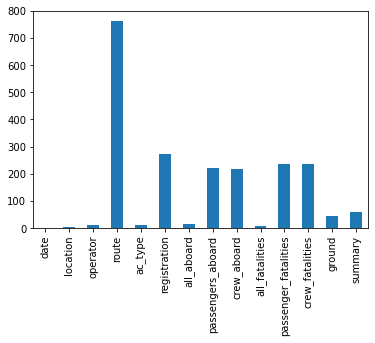

In [13]:
#to visualise missing values in current dataframe
df.isna().sum().plot(kind='bar')

In [14]:
df = df.dropna(axis='rows',thresh=10)

<AxesSubplot:>

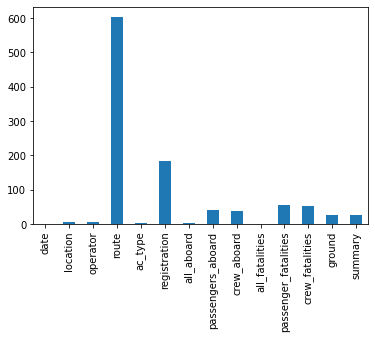

In [15]:
df.isna().sum().plot(kind='bar')

In [16]:
#To fill missing values with 'NoRouteFound'
df['route'].fillna(value='NoRouteFound',inplace=True)

In [17]:
df.isnull().sum()

date                      0
location                  5
operator                  7
route                     0
ac_type                   4
registration            183
all_aboard                2
passengers_aboard        40
crew_aboard              38
all_fatalities            0
passenger_fatalities     55
crew_fatalities          54
ground                   28
summary                  26
dtype: int64

In [18]:
df['registration'].fillna(value='NoRegistration',inplace=True)

In [19]:
#to filter out the existing null values 
for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print(columns,':{:.2%}'.format(df[columns].isnull().sum()/df[columns].shape[0]))

location :0.10%
operator :0.15%
ac_type :0.08%
all_aboard :0.04%
passengers_aboard :0.83%
crew_aboard :0.79%
passenger_fatalities :1.14%
crew_fatalities :1.12%
ground :0.58%
summary :0.54%


In [20]:
df['location'].isnull().sum()

5

In [21]:
null_location = df[df['location'].isnull()]
null_location

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
360,1934-12-31,NaN,Aeroflot,NoRouteFound,Tupolev ANT-9,NoRegistration,10,8,2,10,8,2,0,Crashed under unknown circumstances.
465,1937-06-20,NaN,ENTA,San José San Isidro de El General,Travel Air 6000,TI-3,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...
646,1942-08-21,NaN,Deutsche Lufthansa,NoRouteFound,Siebel Si-204,NoRegistration,4,2,2,4,2,2,0,"Lufthansa chairman, Von Gablenz killed."
999,1947-11-27,NaN,China National Aviation Corporation,NoRouteFound,Douglas DC-3,NoRegistration,3,0,3,2,0,2,0,The cargo plane was shot down by communist ant...
2895,1977-01-20,NaN,North Canada Air,NoRouteFound,Bristol 170 Freighter 31M,C-FWAD,2,0,2,1,0,1,0,The cargo plane stalled nearly vertical and cr...


The dataframe segregated under null_location is done to focus on the number of null values corresponding these indices. In this observation, 4 out of 5 values have 3 missing variables, hence, leaving us with no credible information. 
To drop specific values from a dataframe, assigning separate variables with these indices would be helpful. 

In [22]:
i=df[(df.date=='1942-08-21')].index
df=df.drop(i)

In [23]:
i3=df[(df.date=='1977-01-20')].index
df.loc[i3]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
2895,1977-01-20,NaN,North Canada Air,NoRouteFound,Bristol 170 Freighter 31M,C-FWAD,2,0,2,1,0,1,0,The cargo plane stalled nearly vertical and cr...


In [24]:
i2=df[(df.date=='1947-11-27')].index
df.loc[i2]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
999,1947-11-27,NaN,China National Aviation Corporation,NoRouteFound,Douglas DC-3,NoRegistration,3,0,3,2,0,2,0,The cargo plane was shot down by communist ant...
1000,1947-11-27,"Yakutat, Alaska",Columbia Air Cargo,Fairbanks - Yakutat,Douglas DC-3C,NC95486,13,11,2,13,11,2,0,Crashed into trees while on approach to Yakuta...
1001,1947-11-27,"Montenegrin Mountains, Yugoslavia",JAT Yugoslav Airlines,Zagreb - Titograd,Lisunov LI-2,YU-BAD,22,19,3,22,19,3,0,The aircraft crashed and burned 2 miles from T...


Dropping rows based on the index value would not be feasible in the case of i2, since the crash date caters 3 different crashes. 

In [25]:
i_2= df[((df.date=='1922-04-08')&(df.location=='Pao Ting Fou, China')&(df.route=='Test'))].index
df.loc[i_2]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
67,1922-04-08,"Pao Ting Fou, China",NaN,Test,NaN,NoRegistration,17,0,17,17,0,17,0,Aboard were all workers taking part in a fligh...


In [26]:
df.isnull().sum()

date                     0
location                 4
operator                 7
route                    0
ac_type                  4
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 26
dtype: int64

In [27]:
df['operator'].fillna(value='NoOperator',inplace=True)
df['location'].fillna(value='NotFound',inplace=True)

In [28]:
df.isnull().sum()

date                     0
location                 0
operator                 0
route                    0
ac_type                  4
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 26
dtype: int64

In [29]:
#ac_type null values
ac_type = df[df['ac_type'].isnull()]
ac_type

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
67,1922-04-08,"Pao Ting Fou, China",NoOperator,Test,NaN,NoRegistration,17,0,17,17,0,17,0,Aboard were all workers taking part in a fligh...
859,1946-04-08,"Near Shensi, China",NoOperator,Shensi - Yenan,NaN,NoRegistration,14,11,3,14,11,3,0,NaN
1268,1951-08-08,"Barilla Bay, Australia",Trans Australia Airlines,Hobart Melbourne,NaN,VH-TAT,2,0,2,2,0,2,0,Cargo plane. Loss of lateral control during a ...
1924,1961-11-22,"Harare, Zimbabwe",Rhodesian Air Services,Salisbury - Livingstone - Elizabethville,NaN,VP-YRX,3,0,3,3,0,3,0,The aircraft was on a charter flight to Living...


In [30]:
i_ac= df[((df.date=='1946-04-08')&(df.location=='Near Shensi, China')&(df.route=='Shensi - Yenan'))].index
df=df.drop(i_ac)
df['ac_type'].fillna(value='NotFound',inplace=True)

In [31]:
df.isnull().sum()

date                     0
location                 0
operator                 0
route                    0
ac_type                  0
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 25
dtype: int64

In [32]:
#separating the missing numeric values from the primary dataset
missing_aboard = df[(df['passengers_aboard'].isnull())&(df['crew_aboard'].isnull())]
missing_fatalities = df[(df['passenger_fatalities'].isnull())&(df['crew_fatalities'].isnull())]
ground = df[(df['ground'].isnull())]
summary = df[(df['summary'].isnull())]

In [33]:
#dropping the missing values from the primary dataset for further EDA
df = df.dropna()
df.isnull().sum()

date                    0
location                0
operator                0
route                   0
ac_type                 0
registration            0
all_aboard              0
passengers_aboard       0
crew_aboard             0
all_fatalities          0
passenger_fatalities    0
crew_fatalities         0
ground                  0
summary                 0
dtype: int64

In [34]:
df.dtypes

date                    datetime64[ns]
location                        object
operator                        object
route                           object
ac_type                         object
registration                    object
all_aboard                      object
passengers_aboard               object
crew_aboard                     object
all_fatalities                  object
passenger_fatalities            object
crew_fatalities                 object
ground                          object
summary                         object
dtype: object

In [35]:
#changing datatypes of the numeric columns to int
int_col= ['all_aboard','passengers_aboard','crew_aboard','all_fatalities','passenger_fatalities','crew_fatalities','ground']
for col in df[int_col]:
    df[col]= df[col].astype(int)
    assert df[col].dtype==int
print(df.dtypes)

date                    datetime64[ns]
location                        object
operator                        object
route                           object
ac_type                         object
registration                    object
all_aboard                       int32
passengers_aboard                int32
crew_aboard                      int32
all_fatalities                   int32
passenger_fatalities             int32
crew_fatalities                  int32
ground                           int32
summary                         object
dtype: object


In [37]:
#to detect American states in the location column 
us_states = pd.read_csv(r'C:\Users\NAMEERA\Downloads\us_states.csv')

In [38]:
us_states

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [39]:
column_names = df.columns
loc = pd.DataFrame(columns = column_names)
for states in us_states['state']:
    iteration = df[df['location'].str.split().str.get(-1)==states]
    loc = loc.append(iteration)

In [40]:
loc

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
840,1946-01-06,"Birmingham, Alabama",Pennsylvania Central Airlines,"New York City - Birmingham, AL",Douglas DC-3,N21786,11,7,4,3,0,3,0,"In worsening weather conditions, the plane lan..."
1375,1953-02-14,"Off Mobile, Alabama",National Airlines,Miami - Orlando - New Orleans,Douglas DC-6,N90893,46,41,5,46,41,5,0,The aircraft crashed into the Gulf of Mexico o...
3358,1985-11-15,"Dothan, Alabama",Military - U.S. Air Force,Test flight,Convair CV-340,54-2817,4,0,4,4,0,4,0,Crashed during a test flight. The elevators lo...
3712,1991-07-10,"Birmingham, Alabama",L'Express Airlines,New Orleans - Mobile - Birmingham,Beechcraft BE-99-C99,N7217L,15,13,2,13,12,1,0,"While the aircraft was on approach, it entered..."
3844,1993-07-12,"Talladega, Alabama",Private,Birmingham - Talladega,"Helicopter, Hughes 369HS",N9116F,2,1,1,1,1,0,0,The helicopter crashed while attempting to lan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1955-10-06,"Near Centennial, Wyoming",United Air Lines,Denver - Salt Lake City - San Francisco,Douglas DC-4,N30062,66,63,3,66,63,3,0,The aircraft crashed into cloud covered Medici...
3146,1981-10-01,"Casper, Wyoming",Sky Train Air,"Casper, WY - McAllen, TX",Learjet 24,N44CJ,3,1,2,3,1,2,0,"A loss of control, possibly initiated by an un..."
4020,1996-04-11,"Cheyenne, Wyoming",Private,"Cheyenne, WY - Lincoln, NE",Cessna 177B,N35207,3,2,1,3,2,1,0,"Seven- year-old trainee pilot, Jessica Dubroff..."
4042,1996-08-17,"Near Jackson Hole, Wyoming",Military - U.S. Air Force,"Jackson Hole, WY - New York, NY",Lockheed C-130H Hercules,74-1662,9,1,8,9,1,8,0,The plane struck a mountain. Failure of the cr...


<AxesSubplot:>

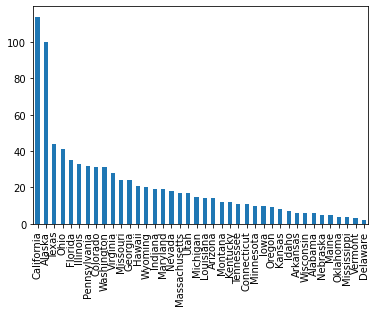

In [41]:
loc_states= loc['location'].str.split().str.get(-1)
loc_states.value_counts().plot(kind='bar')

In [42]:
loc['location'] = loc['location'] + (', USA')
loc

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
840,1946-01-06,"Birmingham, Alabama, USA",Pennsylvania Central Airlines,"New York City - Birmingham, AL",Douglas DC-3,N21786,11,7,4,3,0,3,0,"In worsening weather conditions, the plane lan..."
1375,1953-02-14,"Off Mobile, Alabama, USA",National Airlines,Miami - Orlando - New Orleans,Douglas DC-6,N90893,46,41,5,46,41,5,0,The aircraft crashed into the Gulf of Mexico o...
3358,1985-11-15,"Dothan, Alabama, USA",Military - U.S. Air Force,Test flight,Convair CV-340,54-2817,4,0,4,4,0,4,0,Crashed during a test flight. The elevators lo...
3712,1991-07-10,"Birmingham, Alabama, USA",L'Express Airlines,New Orleans - Mobile - Birmingham,Beechcraft BE-99-C99,N7217L,15,13,2,13,12,1,0,"While the aircraft was on approach, it entered..."
3844,1993-07-12,"Talladega, Alabama, USA",Private,Birmingham - Talladega,"Helicopter, Hughes 369HS",N9116F,2,1,1,1,1,0,0,The helicopter crashed while attempting to lan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1955-10-06,"Near Centennial, Wyoming, USA",United Air Lines,Denver - Salt Lake City - San Francisco,Douglas DC-4,N30062,66,63,3,66,63,3,0,The aircraft crashed into cloud covered Medici...
3146,1981-10-01,"Casper, Wyoming, USA",Sky Train Air,"Casper, WY - McAllen, TX",Learjet 24,N44CJ,3,1,2,3,1,2,0,"A loss of control, possibly initiated by an un..."
4020,1996-04-11,"Cheyenne, Wyoming, USA",Private,"Cheyenne, WY - Lincoln, NE",Cessna 177B,N35207,3,2,1,3,2,1,0,"Seven- year-old trainee pilot, Jessica Dubroff..."
4042,1996-08-17,"Near Jackson Hole, Wyoming, USA",Military - U.S. Air Force,"Jackson Hole, WY - New York, NY",Lockheed C-130H Hercules,74-1662,9,1,8,9,1,8,0,The plane struck a mountain. Failure of the cr...


From the observation above, it seems like all the crashes were legitimate and none are duplications. However, the recurrence of crashes at the same location or by the same operator may have caused the discrepancy of a duplicate value. Why have I concluded as such? The dates mentioned in the collected data are at least a year apart from one another if not months.

I guess it is safe to say that the aircrafts being operated were rather not in a good condition for any flight to take place. From the observation made, weather conditions remain an outlier. Perhaps this perspective is wrong, thus leaving space for more exploratory data analysis to be conducted.